In [1]:
from pulp import *
import pandas as pd

# Вариант 18 - данные:

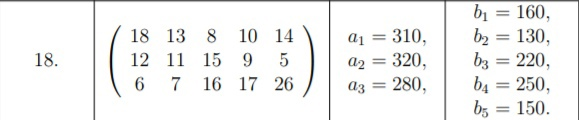

### Надо определить:
* Поставщиков A1, A2, A3 с запасами a1, a2 , a3 
* Потребителей B1, B2, B3, B4, B5 с потребностями b1, b2, b3, b4, b5

### Вношу данные и присваиваю:

In [2]:
suppliers = ["A1", "A2", "A3"] 

a1, a2, a3 = 310, 320, 280 

supply = {"A1": a1, "A2": a2, "A3" : a3} 

In [3]:
consumers = ["B1", "B2", "B3", "B4", "B5"] 

b1, b2, b3, b4, b5 = 160, 130, 220, 250, 150

needs = {
    "B1": b1,
    "B2": b2,
    "B3": b3,
    "B4": b4,
    "B5": b5,
}

In [4]:
supply, needs

({'A1': 310, 'A2': 320, 'A3': 280},
 {'B1': 160, 'B2': 130, 'B3': 220, 'B4': 250, 'B5': 150})

#### Проверка на то, что транспортная задача закрытого типа:

In [5]:
if sum(supply.values()) == sum(needs.values()):
    print("Задача закрытый типа.")
else:
    print("Задача открытого типа.")

Задача закрытый типа.


### Матрица тарифов - данные по варианту:

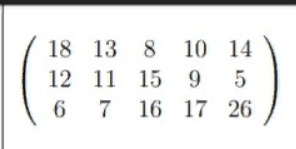

In [6]:
tariffs = [
    [18, 13, 8, 10, 14],
    [12, 11, 15, 9, 5],
    [6, 7, 16, 17, 26]]

tariffs = makeDict([suppliers, consumers], tariffs, 0)

### Задача минимизации

In [7]:
model = LpProblem("Distribution_Problem", LpMinimize)
model

Distribution_Problem:
MINIMIZE
None
VARIABLES

### Целевая функция:

In [8]:
Routes = [(w, b) for w in suppliers for b in consumers]
goods = LpVariable.dicts("Количество_товаров", (suppliers, consumers), 0, None, LpInteger)

model += (
    lpSum([goods[w][b] * tariffs[w][b] for (w, b) in Routes]),
    "Сумма_траспортировки"
)
model

Distribution_Problem:
MINIMIZE
18*Количество_товаров_A1_B1 + 13*Количество_товаров_A1_B2 + 8*Количество_товаров_A1_B3 + 10*Количество_товаров_A1_B4 + 14*Количество_товаров_A1_B5 + 12*Количество_товаров_A2_B1 + 11*Количество_товаров_A2_B2 + 15*Количество_товаров_A2_B3 + 9*Количество_товаров_A2_B4 + 5*Количество_товаров_A2_B5 + 6*Количество_товаров_A3_B1 + 7*Количество_товаров_A3_B2 + 16*Количество_товаров_A3_B3 + 17*Количество_товаров_A3_B4 + 26*Количество_товаров_A3_B5 + 0
VARIABLES
0 <= Количество_товаров_A1_B1 Integer
0 <= Количество_товаров_A1_B2 Integer
0 <= Количество_товаров_A1_B3 Integer
0 <= Количество_товаров_A1_B4 Integer
0 <= Количество_товаров_A1_B5 Integer
0 <= Количество_товаров_A2_B1 Integer
0 <= Количество_товаров_A2_B2 Integer
0 <= Количество_товаров_A2_B3 Integer
0 <= Количество_товаров_A2_B4 Integer
0 <= Количество_товаров_A2_B5 Integer
0 <= Количество_товаров_A3_B1 Integer
0 <= Количество_товаров_A3_B2 Integer
0 <= Количество_товаров_A3_B3 Integer
0 <= Количество_то

### Задаю, а затем добавляю в модель:
* Ограничения объема запаса у каждого поставщика
* Ограничения потребности у каждого потребителя

In [9]:
for w in suppliers:
    model += (
        lpSum([goods[w][b] for b in consumers]) <= supply[w],
        "Сумма_товаров_поставщиков_%s" % w
    )
    
for b in consumers:
    model += (
        lpSum([goods[w][b] for w in suppliers]) == needs[b],
        "Сумма_товаров_потребителей_%s" % b
    )

model   

Distribution_Problem:
MINIMIZE
18*Количество_товаров_A1_B1 + 13*Количество_товаров_A1_B2 + 8*Количество_товаров_A1_B3 + 10*Количество_товаров_A1_B4 + 14*Количество_товаров_A1_B5 + 12*Количество_товаров_A2_B1 + 11*Количество_товаров_A2_B2 + 15*Количество_товаров_A2_B3 + 9*Количество_товаров_A2_B4 + 5*Количество_товаров_A2_B5 + 6*Количество_товаров_A3_B1 + 7*Количество_товаров_A3_B2 + 16*Количество_товаров_A3_B3 + 17*Количество_товаров_A3_B4 + 26*Количество_товаров_A3_B5 + 0
SUBJECT TO
Сумма_товаров_поставщиков_A1: Количество_товаров_A1_B1
 + Количество_товаров_A1_B2 + Количество_товаров_A1_B3
 + Количество_товаров_A1_B4 + Количество_товаров_A1_B5 <= 310

Сумма_товаров_поставщиков_A2: Количество_товаров_A2_B1
 + Количество_товаров_A2_B2 + Количество_товаров_A2_B3
 + Количество_товаров_A2_B4 + Количество_товаров_A2_B5 <= 320

Сумма_товаров_поставщиков_A3: Количество_товаров_A3_B1
 + Количество_товаров_A3_B2 + Количество_товаров_A3_B3
 + Количество_товаров_A3_B4 + Количество_товаров_A3_B5 

### Результаты минимизации

In [10]:
status = model.solve()

In [11]:
print(f"Статус решения: {model.status}, {LpStatus[model.status]}")

for v in model.variables():
    print(v.name, "=", v.varValue)

print(f"Оптимальное значение целевой функции = {value(model.objective)}")

Статус решения: 1, Optimal
Количество_товаров_A1_B1 = 0.0
Количество_товаров_A1_B2 = 0.0
Количество_товаров_A1_B3 = 220.0
Количество_товаров_A1_B4 = 90.0
Количество_товаров_A1_B5 = 0.0
Количество_товаров_A2_B1 = 0.0
Количество_товаров_A2_B2 = 10.0
Количество_товаров_A2_B3 = 0.0
Количество_товаров_A2_B4 = 160.0
Количество_товаров_A2_B5 = 150.0
Количество_товаров_A3_B1 = 160.0
Количество_товаров_A3_B2 = 120.0
Количество_товаров_A3_B3 = 0.0
Количество_товаров_A3_B4 = 0.0
Количество_товаров_A3_B5 = 0.0
Оптимальное значение целевой функции = 6760.0


### Оптимальный план и стоимость перевозки груза:

In [12]:
obj = pd.Series([v.varValue for v in model.variables()])

arr = obj.values

reshaped_arr = arr.reshape((3, 5))

In [13]:
df = pd.DataFrame(reshaped_arr, index=suppliers, columns=consumers)
print(f"Оптимальная стоимость перевозки груза = {value(model.objective)}")
df

Оптимальная стоимость перевозки груза = 6760.0


,B1,B2,B3,B4,B5
A1,0.0,0.0,220.0,90.0,0.0
A2,0.0,10.0,0.0,160.0,150.0
A3,160.0,120.0,0.0,0.0,0.0
